__Universidade Federal do Pará  
  Disciplina: Processamento Digital de Imagens  
  Docente: Ronaldo Zampolo  
  Discentes:  
  &nbsp;&nbsp;&nbsp;&nbsp;Hiago Prata     - 201406840049  
  &nbsp;&nbsp;&nbsp;&nbsp;André Blanco    - 201406840045  
  &nbsp;&nbsp;&nbsp;&nbsp;Daniel Avelar   - 201406840002  
  &nbsp;&nbsp;&nbsp;&nbsp;Leomar Nogueira - 201406840066  
  &nbsp;&nbsp;&nbsp;&nbsp;Ekivaldo Moniz  - 201406840020   
  &nbsp;&nbsp;&nbsp;&nbsp;Gabriel Araujo  - 201306840043
__

---

## Relatório parcial (29/06/2018)

### Implementação  

Optamos por utilizar uma abordagem de Orientação a Objetos para solucionar nosso problema. Nesta parte do relatório apresentamos a implementação da classe e dos métodos criados até agora. Também incluimos as dependências do projeto.

#### Dependências

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

#### Classe e métodos

In [2]:
class Mosaic:
    def __init__(self,file):
        im = Image.open(file) # Lê a imagem de entrada
        self.width, self.height = im.size
        self.original = self.image = np.array(im, dtype="uint8") #  Converte a imagem como array numpy

    def interpolation(self, K):
        output = np.zeros((int(self.width*K), int(self.height*K)), "uint8")
        for i in range(0,K*(self.width-1),K):
            for j in range(0,K*(self.height-1),K):
                for i_add in range(K):
                    for j_add in range(K):
                        output[i+i_add][j+j_add] = self.image[int(i/K)][int(j/K)]
        self.image = output
        self.out = Image.fromarray(output, 'L') # Converte o array pra imagem, declarando que a imagem deve estar em tons de cinza
        self.width, self.height = self.out.size

    def downsampling(self, K):
        output = np.zeros((int(self.width/K), int(self.height/K)), "uint8")
        for i in range(0,self.width, K):
            for j in range(0, self.height, K):
                output[int(i/K)][int(j/K)] = self.image[i][j]
        self.image = output
        self.out = Image.fromarray(output, 'L') # Converte o array pra imagem, declarando que a imagem deve estar em tons de cinza
        self.width, self.height = self.out.size

    def granulate(self, K):
        output = np.zeros((self.width, self.height), "uint8")
        for i in range(0,self.width-K,K):
            for j in range(0,self.height-K,K):
                for i_add in range(K):
                    for j_add in range(K):
                        output[i+i_add][j+j_add] = self.image[i][j]
        self.image = output
        self.out = Image.fromarray(output, 'L') # Converte o array pra imagem, declarando que a imagem deve estar em tons de cinza
        self.width, self.height = self.out.size

---

### Pré-processamento

#### Conversão para escala de cinza  

Por hora, a única etapa de pré-processamento utilizada é a conversão da imagem de entrada para escala de cinza. Fazemos isso, pois para como pensamos em resolver o problema, a intensidade das cores por si só é suficiente.  

Abaixo, é exibida a comparação da imagem de entrada e da imagem convertida para escala de cinza.

In [3]:
rgb = Image.open('lena.png')

gs = rgb.convert(mode='L')

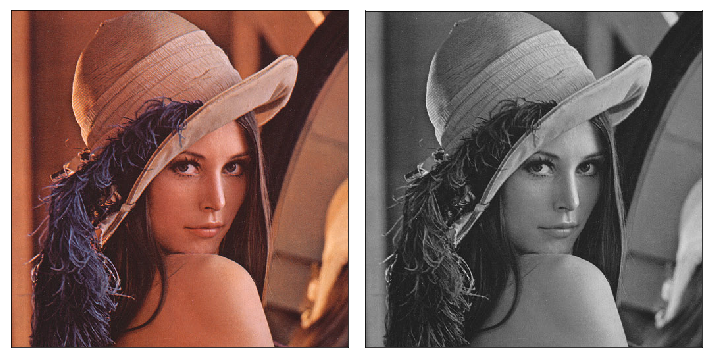

In [4]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(121)
plt.xticks([])
plt.yticks([])
ax1.imshow(rgb)


ax2 = fig.add_subplot(122)
plt.xticks([])
plt.yticks([])
ax2.imshow(gs.convert('RGBA'))

plt.tight_layout()

plt.show()

---

### Reamostragem  

Para realizar a reamostragem da imagem, aqui é instanciado um objeto da classe *Mosaic*, que tratará a imagem com os algoritmos de reamostragem.  

O método *granulate* reamostra a imagem de entrada por um fator **K**, passado como parâmetro. No exemplo abaixo, a ima gem de entrada foi reamostrada por um fator 8, ou seja, a imagem de saída será composta por grupos de pixels de 8x8 px. Para o tamanho da imagem de entrada (512x512 px), este foi o fator que mais aproximou a saída da aparência de um mosaico, sem que a essência da imagem não fosse perdida.

In [5]:
lena = Mosaic('lena_gs.png')

In [6]:
lena.granulate(8)

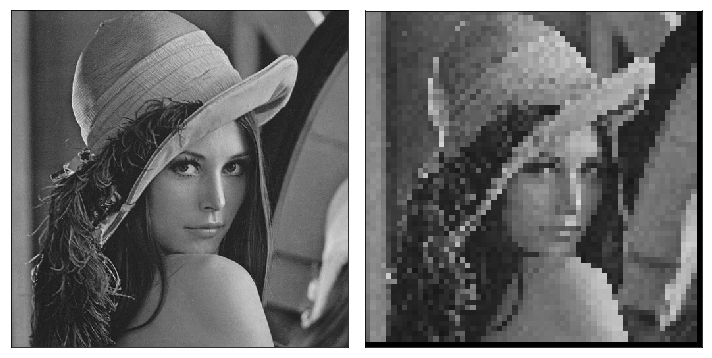

In [7]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(121)
plt.xticks([])
plt.yticks([])
ax1.imshow(gs.convert('RGBA'))


ax2 = fig.add_subplot(122)
plt.xticks([])
plt.yticks([])
ax2.imshow(lena.out.convert('RGBA'))

plt.tight_layout()

plt.show()

---

### Mapeamento de cores  

A partir das amostras cedidas, criamos uma grade, usada para melhor visualizá-las:

In [8]:
import os
import os.path as path

In [9]:
samples = []
for i, sample in enumerate(os.listdir('samples/')):
    if path.isdir(sample):
        continue
    else:
        samples.insert(i, Image.open(path.join('samples/', sample)).resize(size=(128, 128)))

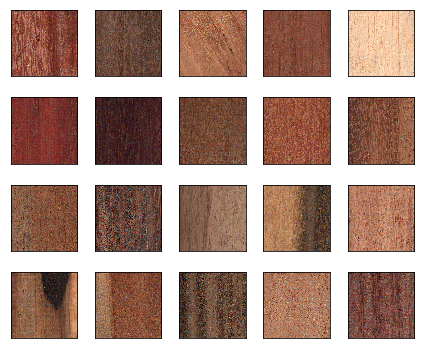

In [10]:
fig = plt.figure(figsize=(6, 5))

for i, sample in enumerate(samples):
    ax = fig.add_subplot(4, 5, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(sample)

plt.tight_layout()
plt.show()
    

Então, para cada amostra, calculamos a média de cores utilizando a função abaixo:

In [11]:
def average_color(sample):
    pix = sample.load()
    totals = [0.0, 0.0, 0.0]
    for y in range(sample.size[1]):
        for x in range(sample.size[0]):
            color = pix[x,y]
            for c in range(3):
                totals[c] += color[c] ** 2.2
    count = sample.size[0] * sample.size[1]
    color = tuple(int(round((totals[c] / count) ** (1/2.2))) for c in range(3))
    return color

In [12]:
colors = []
for i, sample in enumerate(samples):
    colors.insert(i, average_color(sample))

Depois, criamos uma grade para melhor visulizar o resultado.

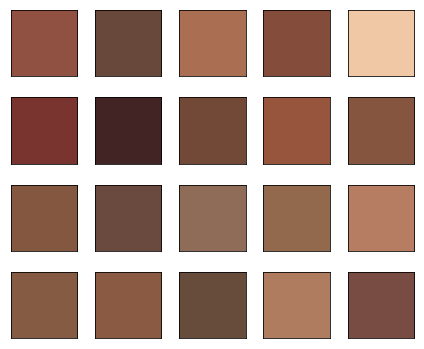

In [13]:
fig = plt.figure(figsize=(6, 5))

for i, color in enumerate(colors):
    ax = fig.add_subplot(4, 5, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(Image.new(color=color, size=(128,128), mode='RGB'))

plt.tight_layout()
plt.show()

Em seguida, realizamos um conversão de espaço de cores, de RGB para HSV. Fazemos isso, para analisarmos a variação de intensidade média das amostras.

In [14]:
rgb = Image.fromarray(np.array(colors, dtype='uint8').reshape(1, 20, 3), mode='RGB')

hsl = np.array(rgb.convert(mode='HSV'))
hsl = np.array(sorted(hsl[0], key=lambda p: p[2])).reshape(1, 20, 3)

In [15]:
rgb_scale = Image.fromarray(np.repeat(hsl, 2, axis=0), mode='HSV').convert(mode='RGB')
i_scale = Image.fromarray(np.repeat(hsl[...,2], 2, axis=0), mode='L').convert(mode='RGB')

Abaixo se vê as cores médias obtidas pela função *average_color* organizadas por nível de intensidade:

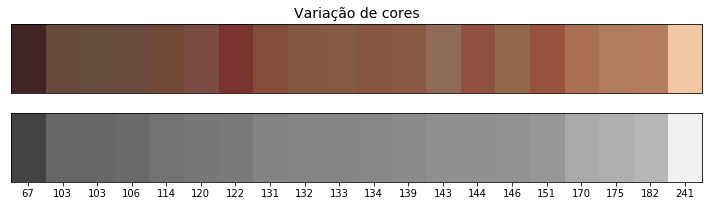

In [16]:
labels = [i for i in hsl[..., 2].flat]
index = np.arange(0, 20)

fig = plt.figure(figsize=(10,3))

ax1 = fig.add_subplot(211)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklines(), visible=False)
plt.yticks([])
ax1.set_title('Variação de cores', fontsize=14)
ax1.imshow(rgb_scale)


ax2 = fig.add_subplot(212)
plt.xticks(index, labels)
plt.yticks([])
ax2.imshow(i_scale)


plt.tight_layout()

plt.show()

---

### Implementações Futuras  

 - Encontrar a melhor forma de mapear as cores da imagem reamostrada para as das amostras;
 - Encontrar uma forma mais elegante para o tratamento das bordas ao gerar o efeito granulado;
 - Melhoria da estrutura do programa;
 - Implementar uma interface gráfica.

